In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import time

ITERACTIONS = 50

print(f'Testando {ITERACTIONS} iterações')

Testando 50 iterações


In [2]:
elapsed = []
def timing(f):
    def wrap(*args, **kwargs):
        time1 = time.time()
        ret = f(*args, **kwargs)
        time2 = time.time()
        interval = round((time2 - time1) * 1000.0, 4)
        elapsed.append(interval)
        return ret
    return wrap

In [3]:
# https://chrispenner.ca/posts/python-tail-recursion
class Recurse(Exception):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs

def recurse(*args, **kwargs):
    raise Recurse(*args, **kwargs)

def recursive(f):
    def wrap(*args, **kwargs):
        while True:
            try:
                return f(*args, **kwargs)
            except Recurse as r:
                args = r.args
                kwargs = r.kwargs
                continue
    return wrap

Fatorial(0): 1
Fatorial(1): 1
Fatorial(2): 2
Fatorial(3): 6
Fatorial(4): 24
Fatorial(5): 120
Fatorial(6): 720
Fatorial(7): 5040
Fatorial(8): 40320
Fatorial(9): 362880
Fatorial(10): 3628800
Fatorial(11): 39916800
Fatorial(12): 479001600
Fatorial(13): 6227020800
Fatorial(14): 87178291200
Fatorial(15): 1307674368000
Fatorial(16): 20922789888000
Fatorial(17): 355687428096000
Fatorial(18): 6402373705728000
Fatorial(19): 121645100408832000
Fatorial(20): 2432902008176640000
Fatorial(21): 51090942171709440000
Fatorial(22): 1124000727777607680000
Fatorial(23): 25852016738884976640000
Fatorial(24): 620448401733239439360000
Fatorial(25): 15511210043330985984000000
Fatorial(26): 403291461126605635584000000
Fatorial(27): 10888869450418352160768000000
Fatorial(28): 304888344611713860501504000000
Fatorial(29): 8841761993739701954543616000000
Fatorial(30): 265252859812191058636308480000000
Fatorial(31): 8222838654177922817725562880000000
Fatorial(32): 263130836933693530167218012160000000
Fatorial(33):

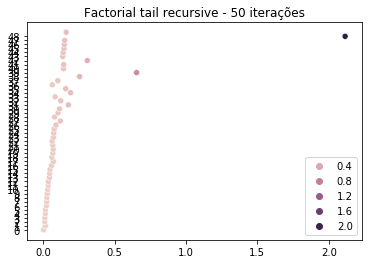

In [4]:
@recursive
def factorial_tail_recursive(n, a = 1):
    if n == 0: 
        return a
    else:
        recurse(n-1, a = a * n)
        
@timing
def test_tail_recursive(n):
    return factorial_tail_recursive(n)

elapsed = []
for i in range(ITERACTIONS):
    r = test_tail_recursive(i)
    print(f'Fatorial({i}): {r}')
times = np.arange(0,len(elapsed))

sns.scatterplot( x = elapsed, y = times, hue = elapsed).set(title=f'Factorial tail recursive - {len(elapsed)} iterações')
plt.yticks(np.arange(min(times), max(times)));

plt.show()

Fatorial(0): 1
Fatorial(1): 1
Fatorial(2): 2
Fatorial(3): 6
Fatorial(4): 24
Fatorial(5): 120
Fatorial(6): 720
Fatorial(7): 5040
Fatorial(8): 40320
Fatorial(9): 362880
Fatorial(10): 3628800
Fatorial(11): 39916800
Fatorial(12): 479001600
Fatorial(13): 6227020800
Fatorial(14): 87178291200
Fatorial(15): 1307674368000
Fatorial(16): 20922789888000
Fatorial(17): 355687428096000
Fatorial(18): 6402373705728000
Fatorial(19): 121645100408832000
Fatorial(20): 2432902008176640000
Fatorial(21): 51090942171709440000
Fatorial(22): 1124000727777607680000
Fatorial(23): 25852016738884976640000
Fatorial(24): 620448401733239439360000
Fatorial(25): 15511210043330985984000000
Fatorial(26): 403291461126605635584000000
Fatorial(27): 10888869450418352160768000000
Fatorial(28): 304888344611713860501504000000
Fatorial(29): 8841761993739701954543616000000
Fatorial(30): 265252859812191058636308480000000
Fatorial(31): 8222838654177922817725562880000000
Fatorial(32): 263130836933693530167218012160000000
Fatorial(33):

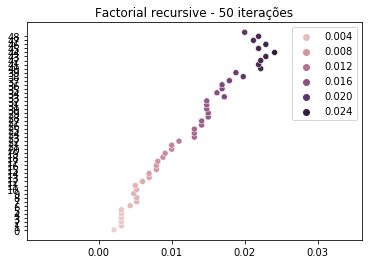

In [5]:
def factorial(n):
    if n == 0: 
        return 1
    else: 
        return factorial(n-1) * n
    
@timing
def test_recursive(n):
    return factorial(n)

elapsed = []
for i in range(ITERACTIONS):
    r = test_recursive(i)
    print(f'Fatorial({i}): {r}')
times = np.arange(0,len(elapsed))

sns.scatterplot( x = elapsed, y = times, hue = elapsed).set(title=f'Factorial recursive - {len(elapsed)} iterações')
plt.yticks(np.arange(min(times), max(times)));

plt.show()

> End